In [162]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timezone
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import random

In [44]:
PATH_TO_DATA = 'data/'

In [45]:
nov_df = pd.read_csv(PATH_TO_DATA + '2019-Nov.csv')
oct_df = pd.read_csv(PATH_TO_DATA + '2019-Oct.csv')
nov_df = nov_df.loc[nov_df['event_type'] == 'purchase']
oct_df = oct_df.loc[oct_df['event_type'] == 'purchase']
Final_data = pd.concat([oct_df, nov_df], ignore_index=True)
Final_data.shape

(1065266, 9)

In [46]:
data = Final_data[['event_time', 'product_id', 'user_id']]

In [47]:
data['Date'] = pd.DatetimeIndex(data['event_time'], dayfirst=True).date

<ipython-input-47-a395bd2762bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.DatetimeIndex(data['event_time'], dayfirst=True).date


In [48]:
data.drop(columns=['event_time'], inplace=True)

/Users/arslan/anaconda3/envs/data_work/lib/python3.8/site-packages/pandas/core/frame.py:4160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [56]:
df = (data.groupby(['Date', 'user_id'])
      .agg({'product_id': lambda x: x.tolist()})
      .reset_index())

In [57]:
df

,Date,user_id,product_id
0,2019-01-10,440756116,[31500231]
1,2019-01-10,451971397,[2800203]
2,2019-01-10,453705583,[22600031]
3,2019-01-10,457360398,[6200373]
4,2019-01-10,469200473,[1005016]
...,...,...,...
569087,2019-12-11,570756453,"[5731717, 5901660, 5745314, 5870801, 5745379, ..."
569088,2019-12-11,570757337,"[5622687, 5622689, 5783987, 5820756, 5844303, ..."
569089,2019-12-11,570758215,"[5567896, 5767376, 5674754, 5726192, 5767368, ..."
569090,2019-12-11,570758761,"[5820072, 5649270, 5649236, 5649235]"


In [58]:
df.product_id[0]

[31500231]

In [59]:
get_id = []
for i in range(0, len(df)):
    if len(df.product_id[i]) == 1:
        get_id.append(i)

In [65]:
df = df.drop(df.index[get_id]).reset_index(drop=True)

In [66]:
max_len = 1
product_row = 0
for i in range(0, df.shape[0]):
    if len(df.product_id[i]) > max_len:
        max_len = len(df.product_id[i])
        product_row = i

In [67]:
max_len

428

In [68]:
data_np = df.product_id.values
for i in range(0, data_np.shape[0]):
    data_np[i] = np.array(data_np[i])
    data_np[i] = data_np[i].astype(np.int32)
    nan_size = max_len - data_np[i].shape[0]
    data_np[i] = np.append(data_np[i], np.repeat(np.nan, nan_size))
Final_data_numpy = np.stack(data_np)

In [81]:
final_df = pd.DataFrame(data=Final_data_numpy[0:,0:], index=[i for i in range(Final_data_numpy.shape[0])], columns=['f'+str(i) for i in range(Final_data_numpy.shape[1])])

In [82]:
final_df.fillna(0, inplace=True)
final_df = final_df.astype(int)
final_df = final_df.astype(str)

In [35]:
# final_df.to_csv('fina_data_rule_mining.csv', index=False)

In [83]:
final_df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f418,f419,f420,f421,f422,f423,f424,f425,f426,f427
0,12500527,30000048,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1801766,3200201,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4801028,4801028,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,17500238,38300061,38400048,38600069,38400088,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1307054,1307108,1306830,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
transactions = []
for i in range(0,len(final_df)):
    transactions.append([final_df.values[i,j] for j in range(0,final_df.shape[1]) if final_df.values[i,j]!='0'])

In [92]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
trans_data = pd.DataFrame(te_ary, columns=te.columns_)

In [95]:
frequent_itemsets = apriori(trans_data, min_support=0.002, use_colnames=True)
print(frequent_itemsets)

      support            itemsets
0    0.014574           (1002524)
1    0.002027           (1002532)
2    0.023145           (1002544)
3    0.003660           (1002547)
4    0.003399           (1002629)
..        ...                 ...
142  0.006276  (1004856, 1004833)
143  0.002262  (1004856, 1004836)
144  0.002014  (1004856, 1004858)
145  0.002402  (1005105, 1005115)
146  0.002817  (5809910, 5809912)

[147 rows x 2 columns]


In [97]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1002524),(1002544),0.014574,0.023145,0.002121,0.145546,6.288369,0.001784,1.143251
1,(1002544),(1002524),0.023145,0.014574,0.002121,0.091645,6.288369,0.001784,1.084847
2,(1002633),(1002544),0.012279,0.023145,0.002262,0.184196,7.958244,0.001977,1.197414
3,(1002544),(1002633),0.023145,0.012279,0.002262,0.097716,7.958244,0.001977,1.094690
4,(1004249),(1005115),0.019826,0.025608,0.002656,0.133986,5.232239,0.002149,1.125146
5,(1005115),(1004249),0.025608,0.019826,0.002656,0.103737,5.232239,0.002149,1.093622
6,(1004767),(1004833),0.042992,0.027542,0.003955,0.091984,3.339844,0.002771,1.070971
7,(1004833),(1004767),0.027542,0.042992,0.003955,0.143586,3.339844,0.002771,1.117460
8,(1004767),(1004836),0.042992,0.015778,0.002677,0.062257,3.945756,0.001998,1.049564
9,(1004836),(1004767),0.015778,0.042992,0.002677,0.169635,3.945756,0.001998,1.152515


In [145]:
len(rules)

28

In [149]:
idx = list(range(0, len(rules), 2))

In [154]:
my_rules = rules.drop(rules.index[idx]).reset_index(drop=True)

In [155]:
support=my_rules['support'].values
confidence=my_rules['confidence'].values

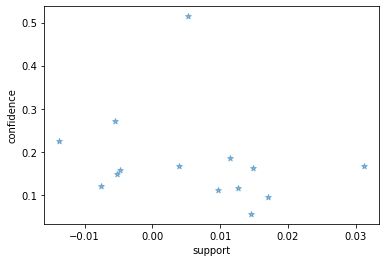

In [156]:
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

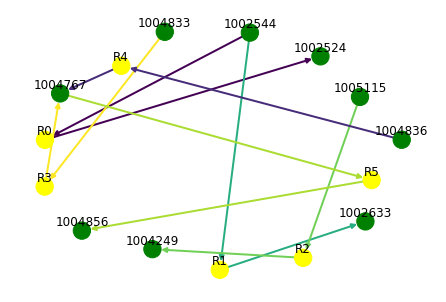

<Figure size 432x288 with 0 Axes>

In [161]:
def draw_graph(rules, rules_to_show):
    import networkx as nx
    G1 = nx.DiGraph()

    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs=['R0','R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])

        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a,"R"+str(i),color=colors[i],weight = 2)

        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i),c,color=colors[i], weight = 2)
    for node in G1:
        found_a_string=False
        for item in strs:
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color = color_map, edge_color = colors, width=weights, font_size=16, with_labels=False)

    for p in pos:
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1,pos)
    plt.show()

    support = rules['support'].values
    confidence = rules['confidence'].values

    import seaborn as sns1

    for i in range (len(support)):
        support[i] = support[i]
        confidence[i] = confidence[i]

    plt.title('Association Rules')
    plt.xlabel('support')
    plt.ylabel('confidence')
    sns1.regplot(x=support,y=confidence,fit_reg=False)

    plt.gcf().clear()
draw_graph(my_rules,6)